<a href="https://colab.research.google.com/github/julianovale/BBDataChallenge/blob/main/001_BBDataChallenge_FilaPSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [ ]:
dados = 'https://raw.githubusercontent.com/julianovale/BBDataChallenge/main/FilasCaixaPSO/Dados/Dataset_publico.csv'
df = pd.read_csv(dados, sep=';')
df.head()

,ID,ID_UOR,TS_INC_EPR,TS_INC_CHMD
0,0,0,2020-09-01 10:01:24,2020-09-01 10:02:13
1,1,0,2020-09-01 10:04:21,2020-09-01 10:22:01
2,2,0,2020-09-01 10:16:14,2020-09-01 10:25:06
3,3,0,2020-09-01 10:28:38,2020-09-01 10:28:40
4,4,0,2020-09-01 10:37:38,2020-09-01 10:37:41


In [ ]:
df.shape

(335612, 4)

In [ ]:
df.isna().sum()

ID               0
ID_UOR           0
TS_INC_EPR       0
TS_INC_CHMD    184
dtype: int64

In [ ]:
df[df['TS_INC_CHMD'].isna()]

,ID,ID_UOR,TS_INC_EPR,TS_INC_CHMD
10228,10228,0,2021-02-24 15:47:22,NaN
11844,11844,0,2021-03-24 15:28:14,NaN
19149,21141,1,2020-09-23 14:55:42,NaN
22495,24487,1,2020-11-12 15:00:58,NaN
27841,29833,1,2021-01-21 15:13:14,NaN
...,...,...,...,...
332793,373863,24,2021-01-06 13:45:31,NaN
332979,374049,24,2021-01-19 14:40:00,NaN
333768,374838,24,2021-03-18 15:06:22,NaN
334469,375539,24,2021-05-11 14:20:22,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(335428, 4)

In [ ]:
df.isna().sum()

ID             0
ID_UOR         0
TS_INC_EPR     0
TS_INC_CHMD    0
dtype: int64

In [ ]:
df.dtypes

ID              int64
ID_UOR          int64
TS_INC_EPR     object
TS_INC_CHMD    object
dtype: object

In [ ]:
df['TS_INC_EPR'] = pd.to_datetime(df['TS_INC_EPR'])
df['TS_INC_CHMD'] = pd.to_datetime(df['TS_INC_CHMD'])

In [ ]:
df.dtypes

ID                      int64
ID_UOR                  int64
TS_INC_EPR     datetime64[ns]
TS_INC_CHMD    datetime64[ns]
dtype: object

In [ ]:
df.head()

,ID,ID_UOR,TS_INC_EPR,TS_INC_CHMD
0,0,0,2020-09-01 10:01:24,2020-09-01 10:02:13
1,1,0,2020-09-01 10:04:21,2020-09-01 10:22:01
2,2,0,2020-09-01 10:16:14,2020-09-01 10:25:06
3,3,0,2020-09-01 10:28:38,2020-09-01 10:28:40
4,4,0,2020-09-01 10:37:38,2020-09-01 10:37:41


In [ ]:
df['DELTA_T'] = df['TS_INC_CHMD'] - df['TS_INC_EPR']
df['DELTA_T'] = [d.total_seconds() for d in df['DELTA_T']]

In [ ]:
df['DT'] = [d.date() for d in df['TS_INC_EPR']]
df['DIA_SEMANA'] = [d.isoweekday() for d in df['DT']]
df['HH_SENHA'] = [d.time() for d in df['TS_INC_EPR']]
df['HH'] = df['TS_INC_EPR'].dt.hour
df['HH_ATEND'] = [d.time() for d in df['TS_INC_CHMD']]
df['DIA'] = [d.day for d in df['TS_INC_EPR']]
df.drop(['TS_INC_EPR','TS_INC_CHMD'], inplace=True, axis=1)
df['MAIOR'] = df['DELTA_T'] > 900 # 15 minutos
df['PICO'] = df['DIA'] <= 10 # dia de pico
df

,ID,ID_UOR,DELTA_T,DT,DIA_SEMANA,HH_SENHA,HH,HH_ATEND,DIA,MAIOR,PICO
0,0,0,49.0,2020-09-01,2,10:01:24,10,10:02:13,1,False,True
1,1,0,1060.0,2020-09-01,2,10:04:21,10,10:22:01,1,True,True
2,2,0,532.0,2020-09-01,2,10:16:14,10,10:25:06,1,False,True
3,3,0,2.0,2020-09-01,2,10:28:38,10,10:28:40,1,False,True
4,4,0,3.0,2020-09-01,2,10:37:38,10,10:37:41,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...
335607,376677,24,39.0,2021-07-30,5,13:05:56,13,13:06:35,30,False,False
335608,376678,24,224.0,2021-07-30,5,13:12:09,13,13:15:53,30,False,False
335609,376679,24,23.0,2021-07-30,5,13:17:08,13,13:17:31,30,False,False
335610,376680,24,14.0,2021-07-30,5,13:27:15,13,13:27:29,30,False,False


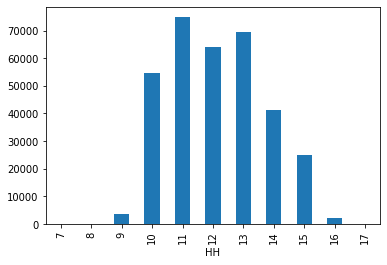

In [ ]:
df.groupby(['HH']).HH.count().plot(kind='bar')

In [ ]:
df.loc[(df['HH']<10)]=10
df.loc[(df['HH']>14)]=14

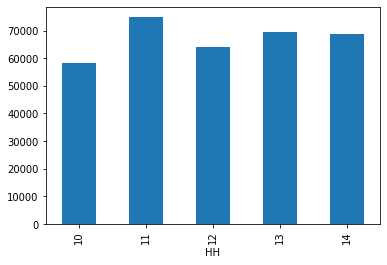

In [ ]:
df.groupby(['HH']).HH.count().plot(kind='bar')

https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/